# Week 3: Constraint satisfaction problems



```
Constraint Satisfaction Problems
(CSPs)
```
- Standard search problem:
    **_state_** is a “black box”—any old data structure that supports goal test, eval, successor
- CSP:
    - **_state_** is defined by _variables_ **_Xi_** with _values_ from _domain_ **_Di_**
    - **_goal test_** is a set of _constraints_ specifying allowable combinations of _values_ for subsets of _variables_
- Simple example of a **_formal representation language_**
- Allows useful **_general-purpose_** algorithms with more power than standard search algorithms

CSPs: The most used techniques
The most used techniques are variants of:

- **Backtracking** _(Depth-First Search)_
- **Constraint Propagation**
    - _Arc Consistency_
- **Local Search**
    - _minConflict (Hill Climbing)_

More In Lectures

- Forward checking
- Arc Consistency


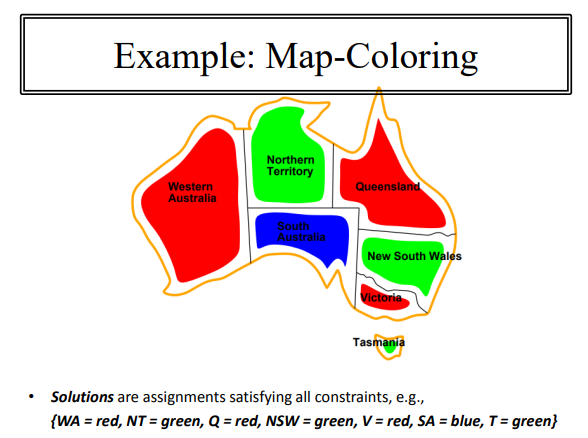

Discuss organization around HWs!!!!

In [1]:
from typing import Any
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
from matplotlib.pyplot import figure
from copy import deepcopy
from typing import Callable
import networkx as nx

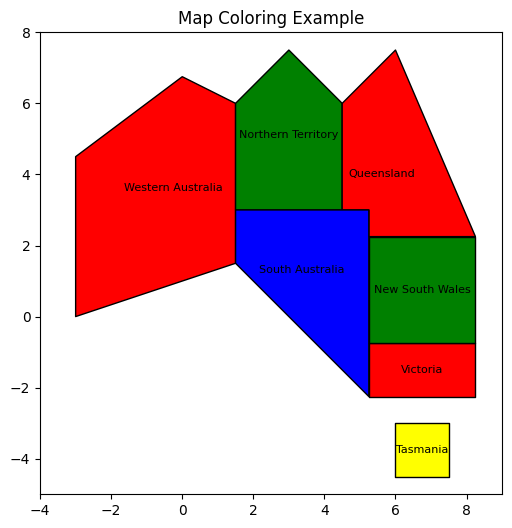

In [2]:
def plot_colored_map(coordinates, region_colors, scale=1.5):
    coordinates = deepcopy(coordinates)
    for k in coordinates:
        coordinates[k] = list(
            map(lambda x: (x[0] * scale, x[1] * scale), coordinates[k])
        )

    patches = []
    for region, coord in coordinates.items():
        polygon = Polygon(coord, closed=True)
        patches.append(polygon)

    fig, ax = plt.subplots(figsize=(6, 6))
    collection = PatchCollection(patches, match_original=True)

    colors = [region_colors.get(region, "grey") for region in coordinates]
    collection.set_facecolor(colors)
    collection.set_edgecolor("black")

    ax.add_collection(collection)

    ax.set_xlim(-4, 9)
    ax.set_ylim(-5, 8)
    ax.set_aspect("equal")

    for region, coords in coordinates.items():
        xs, ys = [], []
        for coord in coords:
            xs.append(coord[0])
            ys.append(coord[1])
        x, y = np.average(xs), np.average(ys)
        # print(coord)
        ax.text(
            x,
            y,
            region,
            fontsize=8,
            verticalalignment="center",
            horizontalalignment="center",
        )

    plt.title("Map Coloring Example")
    plt.show()


coordinates = {
    "Western Australia": [(-2, 0), (-2, 3), (0, 4.5), (1, 4), (1, 2), (1, 1)],
    "Northern Territory": [(1, 4), (2, 5), (3, 4), (3, 2), (1, 2)],
    "Queensland": [(3, 4), (3, 2), (3.5, 2), (3.5, 1.5), (5.5, 1.5), (4, 5)],
    "South Australia": [(1, 2), (3.5, 2), (3.5, -1.5), (1, 1)],
    "Victoria": [(3.5, -1.5), (5.5, -1.5), (5.5, -0.5), (3.5, -0.5)],
    "New South Wales": [(3.5, -0.5), (5.5, -0.5), (5.5, 1.5), (3.5, 1.5)],
    "Tasmania": [(4, -2), (5, -2), (5, -3), (4, -3)],
}

region_colors = {
    "Western Australia": "red",
    "Northern Territory": "green",
    "Queensland": "red",
    "South Australia": "blue",
    "Victoria": "red",
    "New South Wales": "green",
    "Tasmania": "yellow",
}

plot_colored_map(coordinates, region_colors)

In [3]:
neighbours = {
    "WA": ["NT", "SA"],
    "NT": ["WA", "SA", "Q"],
    "SA": ["WA", "NT", "Q", "NSW", "V"],
    "Q": ["NT", "SA", "NSW"],
    "NSW": ["Q", "SA", "V"],
    "V": ["SA", "NSW", "T"],
    "T": ["SA", "Q"],
}

In [4]:
all_colors = {"red", "green", "blue"}

In [5]:
variables = ["WA", "NT", "SA", "Q", "NSW", "V", "T"]

In [6]:
def get_valid_solutions(target_var: str, 
                        color_solutions: dict[str, str], 
                        neighbours: dict[str, list[str]], 
                        all_colors: set[str]) -> set[str]:
    impossible_colors = set()
    for child_var in neighbours.get(target_var, []):
        color_of_child = color_solutions.get(child_var)
        impossible_colors.add(color_of_child)

    return all_colors - impossible_colors

In [7]:
def is_valid_end_solution(neighbours: dict[str, list[str] ], 
                          color_solutions: dict[str, str]) -> bool:
    for node, children in neighbours.items():
        if node not in color_solutions:
            return False

        color_of_node = color_solutions.get(node)
        for child in children:
            color_of_child = color_solutions.get(child)
            if color_of_node is None or color_of_node == color_of_child:
                return False

    return True

In [8]:
assert (
    is_valid_end_solution(neighbours, {}) == False
), "empty assignmenet should be invalid"

assert not is_valid_end_solution(
    neighbours, {"WA": "R", "NA": "R", "SA": "R", "Q": "R", "NSW": "R"}
)

assert not is_valid_end_solution(
    neighbours, {"WA": "R", "NT": "G", "SA": "B", "Q": "R", "NSW": "G", "V": "R"}
)

In [9]:
def find_color_solution(neighbours: dict[str, list[str]], 
                        variables: list[str], 
                        all_colors: set[str]=all_colors) -> dict[str, str]:
    color_solutions = {}

    def dfs(color_solutions: dict[str, str]):
        if is_valid_end_solution(neighbours, color_solutions):
            return color_solutions

        for target_var in variables:
            if target_var in color_solutions:
                continue

            valid_solutions = get_valid_solutions(
                target_var, color_solutions, neighbours, all_colors
            )
            if len(valid_solutions) == 0:
                return {}

            for color in valid_solutions:
                color_solutions[target_var] = color
                solution = dfs(color_solutions)
                if solution is not None and solution != {}:
                    return solution
                del color_solutions[target_var]
        return {}
    
    return dfs(color_solutions)

In [10]:
assignment = find_color_solution(neighbours, variables, all_colors)
print(assignment)

{'WA': 'green', 'NT': 'red', 'SA': 'blue', 'Q': 'green', 'NSW': 'red', 'V': 'green', 'T': 'red'}


In [11]:
print(is_valid_end_solution(neighbours, assignment))

True


In [12]:
alias2name = {
    "WA": "Western Australia",
    "NT": "Northern Territory",
    "SA": "South Australia",
    "Q": "Queensland",
    "NSW": "New South Wales",
    "V": "Victoria",
    "T": "Tasmania",
}

In [13]:
def to_region_colors(region2color: dict[str, str], alias2name: dict[str, str]=alias2name):

    result = {}

    for k in region2color:
        result[alias2name[k]] = region2color[k]
    return result

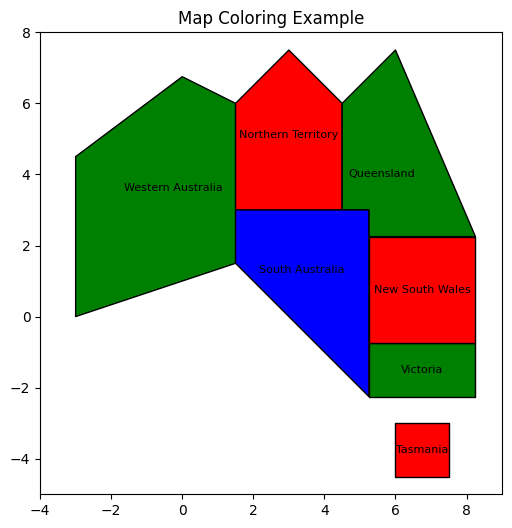

In [14]:
region_colors = to_region_colors(assignment)
plot_colored_map(coordinates, region_colors)

In [15]:
def is_consistent(constraints: dict[Any, set[Any]], 
                  var: Any, 
                  value: Any, 
                  solution: dict[str, str]) -> bool:
    for constraint_var in constraints[var]:
        if constraint_var in solution and solution[constraint_var] == value:
            return False
    return True

In [16]:
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [17]:
print([i**2 for i in range(10) if i % 2 == 0])

[0, 4, 16, 36, 64]


In [18]:
def CSP(
        variables: list[Any],
        domains: dict[Any, set[Any]],
        constraints: dict[Any, set[Any]],
        is_consistent: Callable
    ):
    solution = {}
    
    def select_unassigned_variable(variables, domains, solution):
        unassigned_vars = [var for var in variables if var not in solution]
        return min(unassigned_vars, key=lambda var: len(domains[var]))
    
    def dfs(solution: dict):
        if len(solution) == len(variables):
            return solution
        
        var = select_unassigned_variable(variables, domains, solution)
            
        for value in domains[var]:
            if is_consistent(constraints, var, value, solution):
                solution[var] = value
                result = dfs(solution)
                if result is not None:
                    return result
                del solution[var]
        return None
    
    return dfs(solution)

In [19]:
print(variables)

['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T']


In [20]:
assinged = {"WA": "red", 'NT' : 'green'}

# assinged = {}

In [21]:
domains = {}
for var in variables:
    if var not in assinged:
        domains[var] = {"red", "green", "blue"}
    else:
        domains[var] = {assinged[var]}

In [22]:
print(domains)

{'WA': {'red'}, 'NT': {'green'}, 'SA': {'green', 'red', 'blue'}, 'Q': {'green', 'red', 'blue'}, 'NSW': {'green', 'red', 'blue'}, 'V': {'green', 'red', 'blue'}, 'T': {'green', 'red', 'blue'}}


In [23]:
constraints = {}

for k in neighbours:
    constraints[k] = neighbours[k]

In [24]:
print(constraints)

{'WA': ['NT', 'SA'], 'NT': ['WA', 'SA', 'Q'], 'SA': ['WA', 'NT', 'Q', 'NSW', 'V'], 'Q': ['NT', 'SA', 'NSW'], 'NSW': ['Q', 'SA', 'V'], 'V': ['SA', 'NSW', 'T'], 'T': ['SA', 'Q']}


In [25]:
# csp = CSP(variables, domains, constraints, is_consistent)
solution = CSP(variables, domains, constraints, is_consistent)

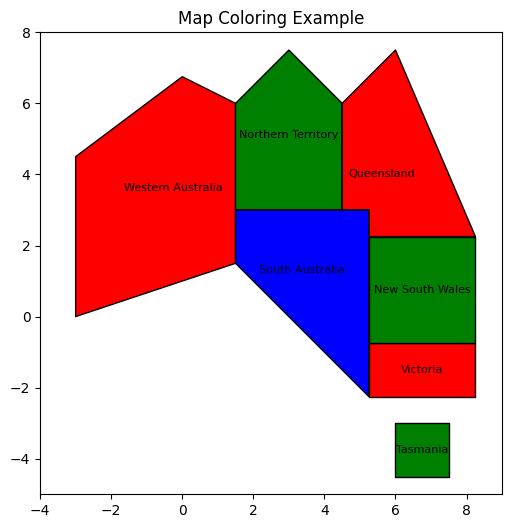

In [26]:
region_colors = to_region_colors(solution)
plot_colored_map(coordinates, region_colors)

In [27]:
puzzle = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 0, 0],
]

def print_sudoku(puzzle: list[list[int]]):
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - ")
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print(" | ", end="")
            print(puzzle[i][j], end=" ")
        print()


print_sudoku(puzzle)

variables = [(i, j) for i in range(9) for j in range(9)]

domains = {
    var: set(range(1, 10)) if puzzle[var[0]][var[1]] == 0 else {puzzle[var[0]][var[1]]}
    for var in variables
}

def add_constraint(constraints, var):
    constraints[var] = set()
    for i in range(9):
        if i != var[0]:
            constraints[var].add((i, var[1]))
        if i != var[1]:
            constraints[var].add((var[0], i))
    sub_i, sub_j = var[0] // 3, var[1] // 3
    for i in range(sub_i * 3, (sub_i + 1) * 3):
        for j in range(sub_j * 3, (sub_j + 1) * 3):
            if (i, j) != var:
                constraints[var].add((i, j))


constraints = {}
for i in range(9):
    for j in range(9):
        add_constraint(constraints, (i, j))

5 3 0  | 0 7 0  | 0 0 0 
6 0 0  | 1 9 5  | 0 0 0 
0 9 8  | 0 0 0  | 0 6 0 
- - - - - - - - - - - 
8 0 0  | 0 6 0  | 0 0 3 
4 0 0  | 8 0 3  | 0 0 1 
7 0 0  | 0 2 0  | 0 0 6 
- - - - - - - - - - - 
0 6 0  | 0 0 0  | 2 8 0 
0 0 0  | 4 1 9  | 0 0 5 
0 0 0  | 0 8 0  | 0 0 0 


In [28]:
print(variables)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]


In [29]:
print(domains)

{(0, 0): {5}, (0, 1): {3}, (0, 2): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (0, 3): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (0, 4): {7}, (0, 5): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (0, 6): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (0, 7): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (0, 8): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (1, 0): {6}, (1, 1): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (1, 2): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (1, 3): {1}, (1, 4): {9}, (1, 5): {5}, (1, 6): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (1, 7): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (1, 8): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (2, 0): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (2, 1): {9}, (2, 2): {8}, (2, 3): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (2, 4): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (2, 5): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (2, 6): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (2, 7): {6}, (2, 8): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (3, 0): {8}, (3, 1): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (3, 2): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (3, 3): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (3, 4): {6}, (3, 5): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (3, 6): {1, 2, 3, 4, 5, 6, 7, 8, 9}, (3, 7): {1, 2, 3, 4, 5, 6, 7,

In [30]:
print(constraints[(0, 0)])

{(4, 0), (8, 0), (0, 2), (0, 5), (2, 2), (1, 0), (0, 8), (3, 0), (5, 0), (0, 1), (0, 7), (1, 2), (0, 4), (2, 1), (7, 0), (1, 1), (0, 3), (2, 0), (0, 6), (6, 0)}


In [31]:
for c in constraints[(0, 0)]:
    if c[0] == 0:
        print(c)

(0, 2)
(0, 5)
(0, 8)
(0, 1)
(0, 7)
(0, 4)
(0, 3)
(0, 6)


In [32]:
for c in constraints[(0, 0)]:
    if c[1] == 0:
        print(c)

(4, 0)
(8, 0)
(1, 0)
(3, 0)
(5, 0)
(7, 0)
(2, 0)
(6, 0)


In [33]:
for c in constraints[(0, 0)]:
    if c[0] != 0 and c[1] != 0:
        print(c)

(2, 2)
(1, 2)
(2, 1)
(1, 1)


In [34]:
solution = CSP(variables, domains, constraints, is_consistent)

board = [[0 for i in range(9)] for i in range(9)]
for i, j in solution:
    board[i][j] = solution[i, j]

print_sudoku(board)

5 3 4  | 6 7 8  | 1 9 2 
6 7 2  | 1 9 5  | 3 4 8 
1 9 8  | 3 4 2  | 5 6 7 
- - - - - - - - - - - 
8 5 9  | 7 6 1  | 4 2 3 
4 2 6  | 8 5 3  | 9 7 1 
7 1 3  | 9 2 4  | 8 5 6 
- - - - - - - - - - - 
9 6 1  | 5 3 7  | 2 8 4 
2 8 7  | 4 1 9  | 6 3 5 
3 4 5  | 2 8 6  | 7 1 9 


In [35]:
puzzle = [[0, 0, 0, 0, 0, 0, 0, 0, 0]] * 9

domains = {
    var: set(range(1, 10)) if puzzle[var[0]][var[1]] == 0 else {puzzle[var[0]][var[1]]}
    for var in variables
}

solution = CSP(variables, domains, constraints, is_consistent)

board = [[0 for i in range(9)] for i in range(9)]
for i, j in solution:
    board[i][j] = solution[i, j]

print_sudoku(board)

1 2 3  | 4 5 6  | 7 8 9 
4 5 6  | 7 8 9  | 1 2 3 
7 8 9  | 1 2 3  | 4 5 6 
- - - - - - - - - - - 
2 1 4  | 3 6 5  | 8 9 7 
3 6 5  | 8 9 7  | 2 1 4 
8 9 7  | 2 1 4  | 3 6 5 
- - - - - - - - - - - 
5 3 1  | 6 4 2  | 9 7 8 
6 4 2  | 9 7 8  | 5 3 1 
9 7 8  | 5 3 1  | 6 4 2 


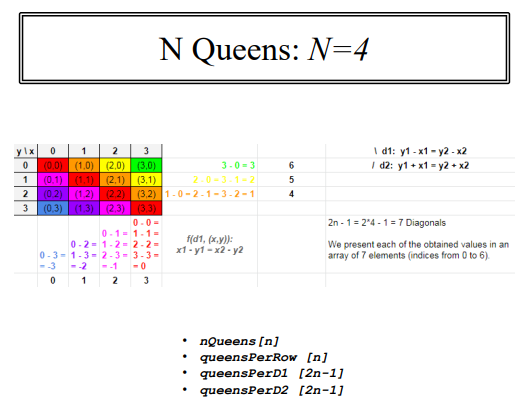

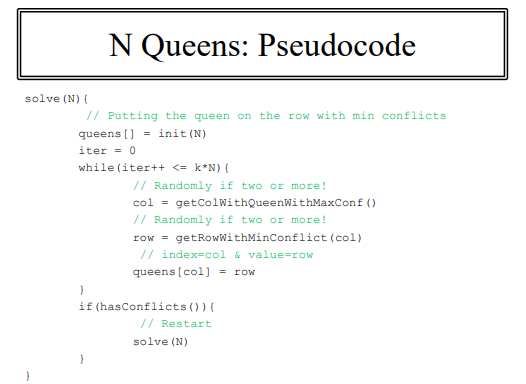

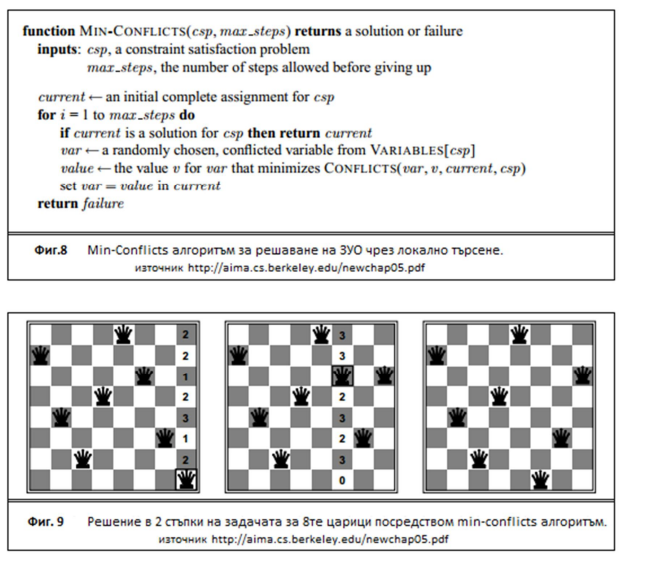